In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train_2v.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df2 = pd.read_csv("test_2v.csv")
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [5]:
df.shape

(43400, 12)

In [7]:
df2.shape

(18601, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18601 entries, 0 to 18600
Data columns (total 11 columns):
id                   18601 non-null int64
gender               18601 non-null object
age                  18601 non-null float64
hypertension         18601 non-null int64
heart_disease        18601 non-null int64
ever_married         18601 non-null object
work_type            18601 non-null object
Residence_type       18601 non-null object
avg_glucose_level    18601 non-null float64
bmi                  18010 non-null float64
smoking_status       12850 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 1.6+ MB


In [10]:
round(((df.isnull().sum()/len(df.index))*100),2)

id                    0.00
gender                0.00
age                   0.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level     0.00
bmi                   3.37
smoking_status       30.63
stroke                0.00
dtype: float64

In [11]:
round(((df2.isnull().sum()/len(df2.index))*100),2)

id                    0.00
gender                0.00
age                   0.00
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level     0.00
bmi                   3.18
smoking_status       30.92
dtype: float64

In [12]:
#remove null values
df=df[~df['bmi'].isnull()]

In [13]:
#remove null values
df2=df2[~df2['bmi'].isnull()]

In [14]:
#replace nan with either  higher count or unknown
df['smoking_status']=df['smoking_status'].fillna('unknown')

In [15]:
#replace nan with either  higher count or unknown
df2['smoking_status']=df2['smoking_status'].fillna('unknown')

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df2.reset_index(drop=True, inplace=True)

In [18]:
df.gender.value_counts()

Female    24945
Male      16986
Other         7
Name: gender, dtype: int64

In [19]:
df2.gender.value_counts()

Female    10679
Male       7330
Other         1
Name: gender, dtype: int64

In [20]:
df=df[df['gender']!='Other']

In [21]:
df2=df2[df2['gender']!='Other']

In [22]:
df['gender'] = df['gender'].apply({'Male':0, 'Female':1}.get)
df['gender'].head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [23]:
df2['gender'] = df2['gender'].apply({'Male':0, 'Female':1}.get)
df2['gender'].head()

0    0
1    1
2    1
3    0
4    1
Name: gender, dtype: int64

In [24]:
df['ever_married'] = df['ever_married'].apply({'No':0, 'Yes':1}.get)
df['ever_married'].head()

0    0
1    1
2    0
3    1
4    0
Name: ever_married, dtype: int64

In [25]:
df2['ever_married'] = df2['ever_married'].apply({'No':0, 'Yes':1}.get)
df2['ever_married'].head()

0    1
1    1
2    0
3    0
4    1
Name: ever_married, dtype: int64

In [26]:
df['Residence_type'] = df['Residence_type'].apply({'Rural':0, 'Urban':1}.get)
df['Residence_type'].head()

0    0
1    1
2    1
3    0
4    0
Name: Residence_type, dtype: int64

In [27]:
df2['Residence_type'] = df2['Residence_type'].apply({'Rural':0, 'Urban':1}.get)
df2['Residence_type'].head()

0    1
1    0
2    0
3    1
4    0
Name: Residence_type, dtype: int64

In [28]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,work_type,smoking_status
0,children,unknown
1,Private,never smoked
2,Private,unknown
3,Private,formerly smoked
4,Never_worked,unknown


In [29]:
df_categorical2 = df2.select_dtypes(include=['object'])
df_categorical2.head()

,work_type,smoking_status
0,Private,formerly smoked
1,Self-employed,formerly smoked
2,children,unknown
3,Private,unknown
4,Govt_job,never smoked


In [47]:
cat_dummies = pd.get_dummies(df_categorical, drop_first=True)
cat_dummies.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,0,0,0,1,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1


In [48]:
cat_dummies2 = pd.get_dummies(df_categorical2, drop_first=True)
cat_dummies2.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1
3,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0


In [32]:
df_no_cat = df.select_dtypes(include=['float64'])
df_no_cat.head()

,age,avg_glucose_level,bmi
0,3.0,95.12,18.0
1,58.0,87.96,39.2
2,8.0,110.89,17.6
3,70.0,69.04,35.9
4,14.0,161.28,19.1


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
nc_columns=list(df_no_cat.columns)

In [36]:
df_no_cat[nc_columns] = scaler.fit_transform(df_no_cat[nc_columns])

In [37]:
df_no_cat.head()

,age,avg_glucose_level,bmi
0,0.035645,0.169964,0.090286
1,0.707031,0.139631,0.332571
2,0.096680,0.236772,0.085714
3,0.853516,0.059479,0.294857
4,0.169922,0.450244,0.102857


In [38]:
df_no_cat2 = df2.select_dtypes(include=['float64'])
df_no_cat2.head()

,age,avg_glucose_level,bmi
0,80.0,83.84,21.1
1,74.0,179.50,26.0
2,14.0,95.16,21.2
3,28.0,94.76,23.4
4,63.0,83.57,27.6


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
nc_columns2=list(df_no_cat2.columns)

In [42]:
df_no_cat2[nc_columns2] = scaler.fit_transform(df_no_cat2[nc_columns2])

In [43]:
df_no_cat2.head()

,age,avg_glucose_level,bmi
0,0.975586,0.130663,0.139565
1,0.902344,0.564063,0.202305
2,0.169922,0.181950,0.140845
3,0.340820,0.180138,0.169014
4,0.768066,0.129440,0.222791


In [44]:
df.drop(['age','avg_glucose_level', 'bmi','work_type','smoking_status'], axis=1, inplace=True)

In [45]:
df2.drop(['age','avg_glucose_level', 'bmi','work_type','smoking_status'], axis=1, inplace=True)

In [52]:
final_df= pd.concat([df,df_no_cat,cat_dummies], axis=1)

In [53]:
final_df2= pd.concat([df2,df_no_cat2,cat_dummies2], axis=1)

In [54]:
final_df.head()

,id,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,age,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,30669,0,0,0,0,0,0,0.035645,0.169964,0.090286,0,0,0,1,0,0,1
1,30468,0,1,0,1,1,0,0.707031,0.139631,0.332571,0,1,0,0,1,0,0
2,16523,1,0,0,0,1,0,0.096680,0.236772,0.085714,0,1,0,0,0,0,1
3,56543,1,0,0,1,0,0,0.853516,0.059479,0.294857,0,1,0,0,0,0,0
4,46136,0,0,0,0,0,0,0.169922,0.450244,0.102857,1,0,0,0,0,0,1


In [55]:
final_df2.head()

,id,gender,hypertension,heart_disease,ever_married,Residence_type,age,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,36306,0,0,0,1,1,0.975586,0.130663,0.139565,0,1,0,0,0,0,0
1,61829,1,0,1,1,0,0.902344,0.564063,0.202305,0,0,1,0,0,0,0
2,14152,1,0,0,0,0,0.169922,0.181950,0.140845,0,0,0,1,0,0,1
3,12997,0,0,0,0,1,0.340820,0.180138,0.169014,0,1,0,0,0,0,1
4,40801,1,0,0,1,0,0.768066,0.129440,0.222791,0,0,0,0,1,0,0


In [56]:
final_df.drop('id', axis=1, inplace=True)

In [57]:
final_df.stroke.value_counts()

0    41288
1      643
Name: stroke, dtype: int64

In [58]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
y=final_df["stroke"]
X=final_df.drop(['stroke'],axis=1)

In [59]:
#Splitting data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size= 0.3, random_state = 100)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29351, 15)
(12580, 15)
(29351,)
(12580,)


In [61]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [62]:
# Linear  model
from sklearn import svm


linear_svm = svm.SVC(kernel='linear')

# fit
linear_svm.fit(X_train, y_train)

# predict
y_pred = linear_svm.predict(X_test)

In [63]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[12369     0]
 [  211     0]]


In [64]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.9832273449920509


In [65]:
#The linear  model gives 91.13%  accuracy
#class wise accuracy
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     12369
          1       0.00      0.00      0.00       211

avg / total       0.97      0.98      0.97     12580



In [66]:
#non linear model
non_linear_svm = svm.SVC(kernel='rbf')

# fit
non_linear_svm.fit(X_train, y_train)

# predict
y_pred_nl = non_linear_svm.predict(X_test)

In [67]:
#get confusion metrics
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_nl))

[[12369     0]
 [  211     0]]


In [68]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_nl))

accuracy 0.9832273449920509


In [69]:
#class wise accuracy
print(metrics.classification_report(y_test, y_pred_nl))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     12369
          1       0.00      0.00      0.00       211

avg / total       0.97      0.98      0.97     12580



In [70]:
#checking for linear classifier  with  optimum value of gamma and c
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [71]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.186325,0.337837,0.359821,0.069610,1,0.01,"{'C': 1, 'gamma': 0.01}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
1,1.451283,0.031659,0.298217,0.008377,1,0.001,"{'C': 1, 'gamma': 0.001}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
2,1.447683,0.057639,0.293217,0.005231,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
3,6.675982,0.685015,0.854249,0.023243,10,0.01,"{'C': 10, 'gamma': 0.01}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
4,1.669695,0.080116,0.320618,0.016813,10,0.001,"{'C': 10, 'gamma': 0.001}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
5,1.442483,0.048461,0.290817,0.009496,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
6,25.635266,0.996128,1.000457,0.026652,100,0.01,"{'C': 100, 'gamma': 0.01}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
7,8.153666,0.307410,0.751643,0.025336,100,0.001,"{'C': 100, 'gamma': 0.001}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
8,1.504886,0.045224,0.293617,0.007736,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281
9,109.528665,9.231366,0.419224,0.079431,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.984159,0.98569,0.98552,...,0.985282,0.001122,1,0.985562,0.98518,0.985222,0.984839,0.985605,0.985282,0.000281


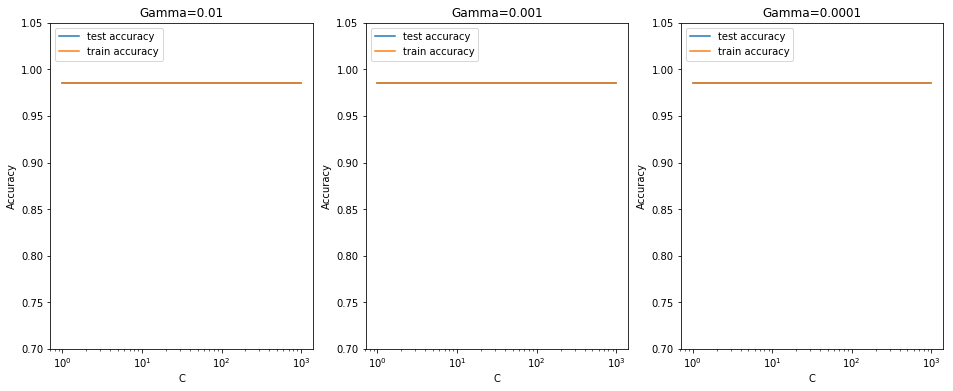

In [72]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.70, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.70, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.70, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [73]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9852815917685939 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


In [75]:
# model with optimal hyperparameters

# model
model = svm.SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred2), "\n")
print(metrics.confusion_matrix(y_test, y_pred2), "\n")

accuracy 0.9832273449920509 

[[12369     0]
 [  211     0]] 



In [76]:
# splitting into label2 and test_final
label2 = final_df2.pop('id')
test_final =final_df2

In [77]:
test_final.shape

(18009, 15)

In [78]:
test2_predicted=model.predict(test_final)

In [79]:
# Creating dataframe
data = pd.DataFrame({'Label': test2_predicted})
data.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [81]:
data['id2'] = label2

In [82]:
data.head()

,Label,id2
0,0,36306.0
1,0,61829.0
2,0,14152.0
3,0,12997.0
4,0,40801.0


In [83]:
data = data[['id2', 'Label']]

In [84]:
data.head()

,id2,Label
0,36306.0,0
1,61829.0,0
2,14152.0,0
3,12997.0,0
4,40801.0,0


In [85]:
data.drop('id2',axis=1, inplace=True)

In [86]:
data.head(200)

,Label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [87]:
data.to_csv('stroke_predictions.csv', sep=",")

In [89]:
data.Label.value_counts()

0    18009
Name: Label, dtype: int64